# Exploratory Notebook for Aviation Project, Group 4



In [1]:
#Bring in packages for analysis.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing the Avaiation Data set 
df = pd.read_csv("data/AviationData.csv", encoding='ISO-8859-1', low_memory=False)

### Initial review of the data

In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [7]:
df.isna().sum()/len(df)*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

### Data cleaning and manipulation: creation of new columns, filtering, and dropping of columns and rows

In [8]:
# Here we are creating a new column for the event year pulling the year from the even date column

df['Event.Year'] = pd.DatetimeIndex(df['Event.Date']).year

In [9]:
# Filtering the events to only occur after the year of 2000, you can see below that our data set has decreased from 88889 down to 41214

df = df[df['Event.Year'] >= 2000]

In [10]:
# Now that the events have been filtered out to only show the data after 2000 we are dropping any columns that are not needed

df = df.drop(columns=['Latitude', 'Longitude', 'Report.Status', 'Airport.Code', 
                'Airport.Name', 'Registration.Number', 'Number.of.Engines', 'Engine.Type',
                'FAR.Description', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight',
                'Report.Status', 'Publication.Date', 'Location']) 

In [11]:
# Removing any aircrafts that were amateur built
df.drop(df.index[df["Amateur.Built"] == "Yes"], inplace=True) 

# Removing any countries outside of the United States because we only want to look at domestic flights
df.drop(df.index[df["Country"] != "United States"], inplace=True)

# Removing any aircrafts that are not categorized under airplane
df.drop(df.index[df["Aircraft.Category"] != "Airplane"], inplace=True)

# Removing any aircrafts that are missing either the make or the model
df.drop(df.index[df['Make'].isna()], inplace = True)
df.drop(df.index[df['Model'].isna()], inplace =True)

In [12]:
df['Make'].value_counts()

CESSNA               4264
PIPER                2494
Cessna               2095
Piper                1089
BEECH                 890
                     ... 
BACH JOSEPH E           1
J&J Ultralights         1
AIRBORNE                1
Ac Mfg & Dev't Co       1
BRADSHAW                1
Name: Make, Length: 1185, dtype: int64

In [13]:
######################### which of these are we using? .capitalize() or .upper()###############################

In [14]:
# Use the same letter casing to combine Make entries
df['Make'] = df['Make'].astype(str)
df['Make'] = df['Make'].str.capitalize()

In [15]:
df['Model'] = df['Model'].astype(str)
df['Model'] = df['Model'].str.upper()

In [16]:
#Manual data cleaning to combine airplane makes with different spellings.
df["Make"] = df["Make"].replace ("Air tractor inc", "Air tractor")
df["Make"] = df["Make"].replace ("Air tractor inc.", "Air tractor")
df["Make"] = df["Make"].replace ("Airbus industrie", "Airbus")
df["Make"] = df["Make"].replace ("American aviation", "American")
df["Make"] = df["Make"].replace ("American aviation corp. (aac)", "American")
df["Make"] = df["Make"].replace ("American champion (acac)", "American champion")
df["Make"] = df["Make"].replace ("American champion aircraft)", "American champion")
df["Make"] = df["Make"].replace ("American legend aircraft co", "American legend")
df["Make"] = df["Make"].replace ("Aviat aircraft inc", "Aviat")
df["Make"] = df["Make"].replace ("Aviat inc", "Aviat")
df["Make"] = df["Make"].replace ("Ayres corporation", "Ayres")
df["Make"] = df["Make"].replace ("Boeing stearman", "Boeing")
df["Make"] = df["Make"].replace ("Boeing company", "Boeing")
df["Make"] = df["Make"].replace ("The boeing company", "Boeing")
df["Make"] = df["Make"].replace ("Bombardier, inc.", "Bombardier")
df["Make"] = df["Make"].replace ("Bombardier inc", "Bombardier")
df["Make"] = df["Make"].replace ("Britten-norman", "Britten norman")
df["Make"] = df["Make"].replace ("Cessna aircraft", "Cessna")
df["Make"] = df["Make"].replace ("Cessna aircraft co", "Cessna")
df["Make"] = df["Make"].replace ("Cessna aircraft company", "Cessna")
df["Make"] = df["Make"].replace ("Christen industries inc", "Christen industries")
df["Make"] = df["Make"].replace ("Cirrus design corp.", "Cirrus")
df["Make"] = df["Make"].replace ("Cirrus design corp", "Cirrus")
df["Make"] = df["Make"].replace ("Cirrus design", "Cirrus")
df["Make"] = df["Make"].replace ("Cirrus design corporation", "Cirrus")
df["Make"] = df["Make"].replace ("Cub crafters", "Cubcrafters")
df["Make"] = df["Make"].replace ("Cub crafters inc", "Cubcrafters")
df["Make"] = df["Make"].replace ("Cubcrafters inc", "Cubcrafters")
df["Make"] = df["Make"].replace ("Dassault-breguet", "Dassault")
df["Make"] = df["Make"].replace ("De havilland", "Dehavilland")
df["Make"] = df["Make"].replace ("Diamond aircraft ind gmbh", "Diamond")
df["Make"] = df["Make"].replace ("Diamond aircraft ind inc", "Diamond")
df["Make"] = df["Make"].replace ("Diamond aircraft industries", "Diamond")
df["Make"] = df["Make"].replace ("Embraer-empresa brasileira de", "Embraer")
df["Make"] = df["Make"].replace ("Embraer s a", "Embraer")
df["Make"] = df["Make"].replace ("Ercoupe (eng & research corp.)", "Ercoupe")
df["Make"] = df["Make"].replace ("Flight design gmbh", "Flight design")
df["Make"] = df["Make"].replace ("Gates learjet corp.", "Gates lear jet")
df["Make"] = df["Make"].replace ("Grumman american", "Grumman")
df["Make"] = df["Make"].replace ("Grumman acft eng cor-schweizer", "Grumman")
df["Make"] = df["Make"].replace ("Grumman american avn. corp.", "Grumman")
df["Make"] = df["Make"].replace ("Grumman-schweizer", "Grumman")
df["Make"] = df["Make"].replace ("Gulfstream-schweizer a/c corp", "Gulfstream")
df["Make"] = df["Make"].replace ("Gulfstream-schweizer", "Gulfstream")
df["Make"] = df["Make"].replace ("Gulfstream american corp", "Gulfstream")
df["Make"] = df["Make"].replace ("Gulfstream aerospace", "Gulfstream")
df["Make"] = df["Make"].replace ("Hawker beechcraft", "Hawker")
df["Make"] = df["Make"].replace ("Hawker beechcraft corp", "Hawker")
df["Make"] = df["Make"].replace ("Hawker beechcraft corp.", "Hawker")
df["Make"] = df["Make"].replace ("Hawker beechcraft corporation", "Hawker")
df["Make"] = df["Make"].replace ("Hawker siddeley", "Hawker")
df["Make"] = df["Make"].replace ("Jabiru usa sport aircraft llc", "Jabiru")
df["Make"] = df["Make"].replace ("Lancair company", "Lancair")
df["Make"] = df["Make"].replace ("Learjet inc", "Learjet")
df["Make"] = df["Make"].replace ("Liberty aerospace incorporated", "Liberty aerospace inc.")
df["Make"] = df["Make"].replace ("Mcdonnell douglas aircraft co", "Mcdonnell douglas")
df["Make"] = df["Make"].replace ("Douglas", "Mcdonnell douglas")
df["Make"] = df["Make"].replace ("Lancair company", "Lancair")
df["Make"] = df["Make"].replace ("Mooney aircraft corp.", "Mooney")
df["Make"] = df["Make"].replace ("Mooney airplane co inc", "Mooney")
df["Make"] = df["Make"].replace ("Nanchang china", "Nanchang")
df["Make"] = df["Make"].replace ("Pilatus aircraft ltd", "Pilatus")
df["Make"] = df["Make"].replace ("Piper aircraft inc", "Piper")
df["Make"] = df["Make"].replace ("Piper aircraft corporation", "Piper")
df["Make"] = df["Make"].replace ("Piper aircraft", "Piper")
df["Make"] = df["Make"].replace ("Piper/cub crafters", "Piper")
df["Make"] = df["Make"].replace ("Quest aircraft company llc", "Quest")
df["Make"] = df["Make"].replace ("Raytheon aircraft company", "Raytheon")
df["Make"] = df["Make"].replace ("Raytheon corporate jets", "Raytheon")
df["Make"] = df["Make"].replace ("Remos acft gmbh flugzeugbau", "Remos aircraft gmbh")
df["Make"] = df["Make"].replace ("Rockwell international", "Rockwell")
df["Make"] = df["Make"].replace ("Ryan aeronautical", "Ryan")
df["Make"] = df["Make"].replace ("Schweizer aircraft corp", "Schweizer")
df["Make"] = df["Make"].replace ("Stearman aircraft", "Stearman")
df["Make"] = df["Make"].replace ("Taylorcraft aviation corp", "Taylorcraft")
df["Make"] = df["Make"].replace ("Thrush aircraft inc", "Thrush")
df["Make"] = df["Make"].replace ("Vans aircraft inc", "Vans")
df["Make"] = df["Make"].replace ("Waco classic aircraft", "Waco")
df["Make"] = df["Make"].replace ("Weatherly aviation co inc", "Weatherly")

In [17]:
df['Make'].value_counts()

Cessna                     6384
Piper                      3614
Beech                      1253
Boeing                      408
Air tractor                 395
                           ... 
Stol aircraft corp            1
Ray e roberts                 1
Piper / laudeman              1
Quad city aircraft corp       1
Bailey n moyes                1
Name: Make, Length: 898, dtype: int64

In [18]:
#Creation of a combined make and model column
df['Make.Model'] = df['Make']+ ' ' + df['Model']

In [19]:
# Review the top 50 makes and models
df['Make.Model'].value_counts()[:50]

Cessna 172          672
Cessna 152          290
Cessna 172S         272
Cessna 182          244
Cessna 172N         237
Piper PA28          232
Cirrus SR22         220
Cessna 180          211
Cessna 172M         174
Piper PA-18-150     173
Piper PA-28-140     154
Beech A36           153
Cessna 150          146
Cessna 172P         140
Cessna 140          114
Cessna 172R         107
Cessna 170B         106
Piper PA-28-180     102
Piper PA-28-161     101
Piper PA-28-181      89
Cessna A185F         89
Mooney M20J          89
Aeronca 7AC          89
Piper PA18           83
Piper PA-18          78
Cessna 182P          76
Cessna 177           73
Cessna 170           73
Piper PA-12          72
Cessna 150L          72
Cirrus SR20          70
Cessna 210           69
Cessna 150M          66
Piper PA-22-150      65
Cessna A185          63
Cessna 208B          61
Luscombe 8A          61
Mooney M20C          60
Cessna 120           59
Piper J3C-65         59
Piper PA 18-150      58
Beech 58        

In [20]:
df['Total.Fatal.Injuries'].value_counts()

0.0     12948
1.0      1366
2.0       759
3.0       226
4.0       133
5.0        44
6.0        20
7.0         8
10.0        5
9.0         3
8.0         3
11.0        1
14.0        1
49.0        1
13.0        1
65.0        1
Name: Total.Fatal.Injuries, dtype: int64

In [21]:
# This creates a new column with "yes" for if the make is boeing or airbus and "no" for everything else.
df["Commercial"] = "No"
df.loc[df["Make"].isin(["Boeing", "Airbus"]), "Commercial"] = "Yes"

In [22]:
#df["Fatal"] = pd.notna(df["Total.Fatal.Injuries"]).astype(int)
df["Fatal"] = np.where((df["Total.Fatal.Injuries"].isna()) | (df["Total.Fatal.Injuries"] == 0), 0, 1)

In [23]:
df['Fatal'].value_counts()

0    15445
1     2572
Name: Fatal, dtype: int64

In [24]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Event.Year,Make.Model,Commercial,Fatal
47864,20001212X20487,Accident,FTW00FA083B,2000-02-16,United States,Fatal(1),Substantial,Airplane,Cessna,208B,...,Unknown,1.0,NaN,NaN,1.0,VMC,2000,Cessna 208B,No,1
47869,20001212X20487,Accident,FTW00FA083A,2000-02-16,United States,Fatal(1),Destroyed,Airplane,Cessna,182M,...,Personal,1.0,NaN,NaN,1.0,VMC,2000,Cessna 182M,No,1
47870,20001212X20472,Accident,DCA00MA026,2000-02-16,United States,Fatal(3),Destroyed,Airplane,Mcdonnell douglas,DC-8-71F,...,NaN,3.0,NaN,NaN,NaN,VMC,2000,Mcdonnell douglas DC-8-71F,No,1
47942,20001212X20606,Accident,DCA00MA030,2000-03-05,United States,Non-Fatal,Destroyed,Airplane,Boeing,737-300,...,Unknown,NaN,2.0,42.0,98.0,VMC,2000,Boeing 737-300,Yes,0
48128,20001212X20873,Accident,MIA00FA129,2000-04-05,United States,Fatal(3),Destroyed,Airplane,Learjet,35A,...,Instructional,3.0,NaN,NaN,NaN,VMC,2000,Learjet 35A,No,1


In [25]:
df['Make'].value_counts()[:40]

Cessna                            6384
Piper                             3614
Beech                             1253
Boeing                             408
Air tractor                        395
Mooney                             379
Cirrus                             330
Grumman                            276
Bellanca                           216
Maule                              207
Aeronca                            199
Aviat                              154
Champion                           153
Dehavilland                        144
Luscombe                           140
Diamond                            130
Stinson                            129
Airbus                             109
North american                     101
Taylorcraft                         96
Embraer                             95
Bombardier                          94
Rockwell                            91
Ayres                               81
Aero commander                      79
Flight design            

In [26]:
Boeing_flights = df.loc[df["Make"] == "Boeing"].index
print(Boeing_flights)


Int64Index([47942, 48402, 49749, 49879, 50033, 51485, 54404, 54831, 55162,
            55630,
            ...
            88316, 88381, 88386, 88387, 88415, 88430, 88673, 88723, 88772,
            88777],
           dtype='int64', length=408)


In [27]:
df['Commercial'].value_counts()

No     17500
Yes      517
Name: Commercial, dtype: int64

In [28]:
#This is grouping our make.model column with the total.fatal.injuries column. 
#It is also declaring a variable to be equal to the make.models with the top 5 most fatalities
MakeModel_fatalities = df.groupby('Make.Model')['Total.Fatal.Injuries'].sum()

top_5_MakeModel_by_fatalities = MakeModel_fatalities.sort_values(ascending=False).head(5)

print(top_5_MakeModel_by_fatalities)

Make.Model
Cirrus SR22         111.0
Cessna 172          103.0
Beech A36            91.0
Boeing 767-200ER     65.0
Cessna 182           63.0
Name: Total.Fatal.Injuries, dtype: float64


In [29]:
#This is declaring variables which will be used for the bar graph axis below after grouping them above. 
make_model_names = top_5_MakeModel_by_fatalities.index
fatal_injuries = top_5_MakeModel_by_fatalities.values

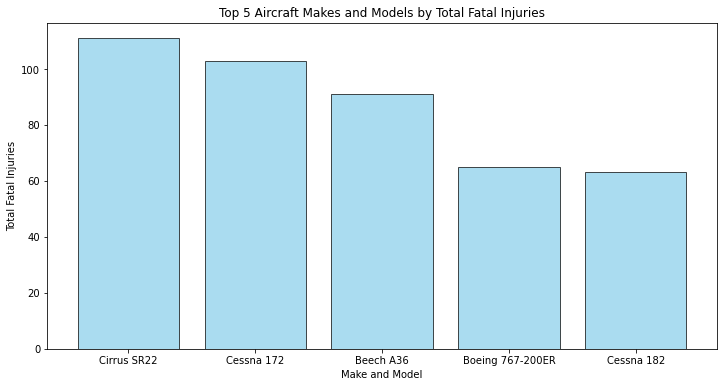

In [30]:
#Bar Chart Showing the Top 5 Make.Models by total Fatalities (All are commercial)
plt.figure(figsize=(12, 6))
plt.bar(make_model_names, fatal_injuries, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Make and Model')
plt.ylabel('Total Fatal Injuries')
plt.title('Top 5 Aircraft Makes and Models by Total Fatal Injuries')
plt.xticks(rotation=0, ha='center');

In [31]:
Commercial_Flights = df[df['Commercial'] == 'Yes']
Totaled_Commercial_Fatalities_by_Make = Commercial_Flights.groupby('Make')['Fatal'].sum()
Totaled_Commercial_Fatalities_by_Make.tail(5)
#This groups the sum of Fatal values equal to 1 based on the Make with a Commercial value of Yes 

Make
Airbus     1
Boeing    14
Name: Fatal, dtype: int32

In [32]:
Boeing_Occurances = 408
Boeing_Fatality_Occurance = 14
Airbus_Occurances = 109
Airbus_Fatality_Occurances = 1

Boeing_Average_Fatality_Occurance = Boeing_Fatality_Occurance/Boeing_Occurances
Airbus_Average_Fatality_Occurance = Airbus_Fatality_Occurances/Airbus_Occurances

print(Boeing_Average_Fatality_Occurance)
print(Airbus_Average_Fatality_Occurance)

0.03431372549019608
0.009174311926605505


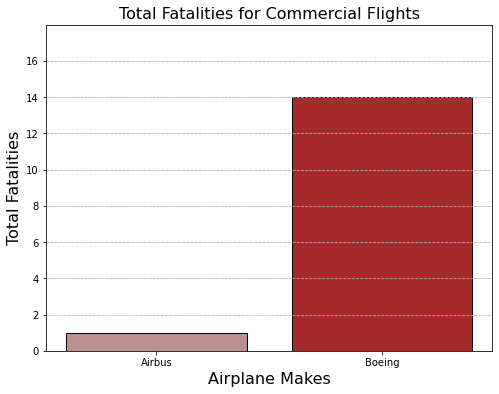

In [33]:
#Hard coding Airbus vs Boeing for the visual
makes = ["Airbus", "Boeing"]
totaled_fatalities_occurence = [1, 14]

plt.figure(figsize=(8, 6))
plt.bar(makes, totaled_fatalities_occurence, color=["rosybrown", "brown"], edgecolor='black')
plt.xlabel("Airplane Makes", fontsize=16)
plt.ylabel("Total Fatalities", fontsize=16)
plt.title("Total Fatalities for Commercial Flights", fontsize=16)
plt.ylim(0, 18)
plt.yticks(range(0, 18, 2))
plt.grid(axis='y', linestyle='--');

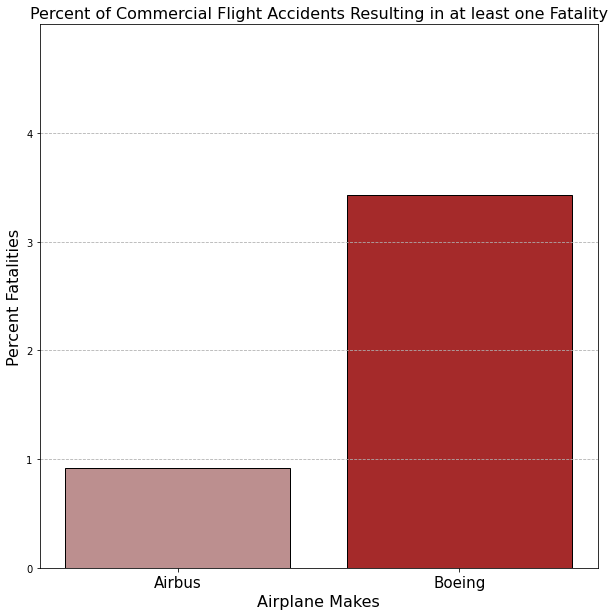

In [34]:
# We can see above that boeing has a lot more occurances of fatal accidents than Airbus. 
# But what is important is comparing the occurances of fatal accidents by the sample size. 
makes = ["Airbus", "Boeing"]
fatalities_occurance_averages = [Airbus_Average_Fatality_Occurance*100, Boeing_Average_Fatality_Occurance*100]

plt.figure(figsize=(10, 10))
plt.bar(makes, fatalities_occurance_averages, color=["rosybrown", "brown"], edgecolor='black')
plt.xlabel("Airplane Makes", fontsize=16)
plt.ylabel("Percent Fatalities", fontsize=16)
plt.title("Percent of Commercial Flight Accidents Resulting in at least one Fatality", fontsize=16)
plt.ylim(0, 5)
plt.yticks(range(0, 5, 1))
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='y', linestyle='--');

In [35]:
#It is difficult to see, but Airbus at 9% and Boeing is at 8.8%  
#Therefore we can recommend Boeing as the Safest Commercial Maker adjusted for the limitations in the dataset.

In [36]:
Private_Flights_Minor_Damage = df[(df['Commercial'] == 'No') & (df['Aircraft.damage'] == 'Minor')]
Private_Flights_Minor_Damage_MostCommon = Private_Flights_Minor_Damage['Make'].value_counts().nlargest(20)
#This is giving us the top 20 most commonly occuring Makes by Minor Damage so we can get the average. 

In [37]:
Private_Flights_Minor_Damage_MostCommon
#As we can see below Cessna has 59 occurences, Piper has 27 occurences, Bombardier has 21 occurences

Cessna               59
Piper                27
Bombardier           21
Beech                18
Embraer              16
Mcdonnell douglas    14
Cirrus               11
Raytheon              8
Dehavilland           6
North american        4
Diamond               4
Taylorcraft           3
Gulfstream            3
Hawker                3
Flight design         3
Mooney                3
Aviat                 3
Air tractor           3
Mitsubishi            2
Great lakes           2
Name: Make, dtype: int64

In [38]:
#Cessna occurs 7088 
#Piper occurs 3950 
#Bombardier occurs 123
#We can find average occurance of minor damages by accidents
Cessna = (59/6384) * 100
Piper = (27/3614) * 100
Bombardier = (21/94) * 100


print(Cessna)
print(Piper)
print(Bombardier)

0.9241854636591478
0.7470946319867183
22.340425531914892


In [39]:
Private_Flights_Destroyed_Damage = df[(df['Commercial'] == 'No') & (df['Aircraft.damage'] == 'Destroyed')]
Private_Flights_Destroyed_MostCommon = Private_Flights_Destroyed_Damage['Make'].value_counts().nlargest(40)

In [40]:
df["Aircraft.damage"].value_counts()

Substantial    15770
Destroyed       1418
Minor            362
Unknown           40
Name: Aircraft.damage, dtype: int64

In [41]:
Private_Flights_Destroyed_MostCommon

Cessna                        401
Piper                         297
Beech                         169
Cirrus                         53
Air tractor                    44
Mooney                         37
Grumman                        34
North american                 15
Raytheon                       14
Dehavilland                    11
Rockwell                       11
Hawker                         11
Champion                       10
Bellanca                       10
Socata                          9
Aviat                           9
Ayres                           8
Maule                           7
Mitsubishi                      7
Aeronca                         7
Aero commander                  6
Gulfstream                      6
Smith                           6
Flight design                   6
Diamond                         6
American                        5
Learjet                         5
Pilatus                         5
Columbia aircraft mfg           4
Mcdonnell doug

In [42]:
#This is going to look up Bombardier directly
Bombardier_Destroyed = df[(df['Make'] == 'Bombardier') & (df['Aircraft.damage'] == 'Destroyed') & (df['Commercial'] == 'No')]
Total_Bomb_Destroyed = len(Bombardier_Destroyed)
Total_Bomb_Destroyed

2

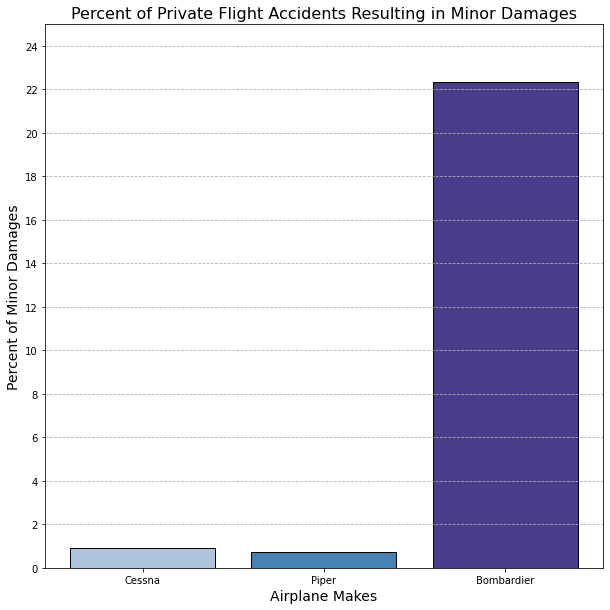

In [43]:
#Since Embraer and Mcdonnel have less than 200 entries in the data set lets only using Cessna, Piper, and Beech
makes = ["Cessna", "Piper", "Bombardier"]
minor_dmg_occurence_averages = [Cessna, Piper, Bombardier]

plt.figure(figsize=(10, 10))
plt.bar(makes, minor_dmg_occurence_averages, color=["lightsteelblue", "steelblue", "darkslateblue"], edgecolor='black')
plt.xlabel("Airplane Makes", fontsize=14)
plt.ylabel("Percent of Minor Damages", fontsize=14)
plt.title("Percent of Private Flight Accidents Resulting in Minor Damages",fontsize=16)
plt.ylim(0, 25)
plt.yticks(range(0, 25, 2))
plt.grid(axis='y', linestyle='--');

In [44]:
#now I need to calculate the averages of Destroyed data occurence
Cessna_Destroyed = (401/6384)*100
Piper_Destroyed = (297/3614)*100
Bombardier_Destroyed = (2/94)*100

print(Cessna_Destroyed)
print(Piper_Destroyed)
print(Bombardier_Destroyed)

#I notice that Cessna has the lowest average for destroyed damage types and the second highest 

6.281328320802006
8.2180409518539
2.127659574468085


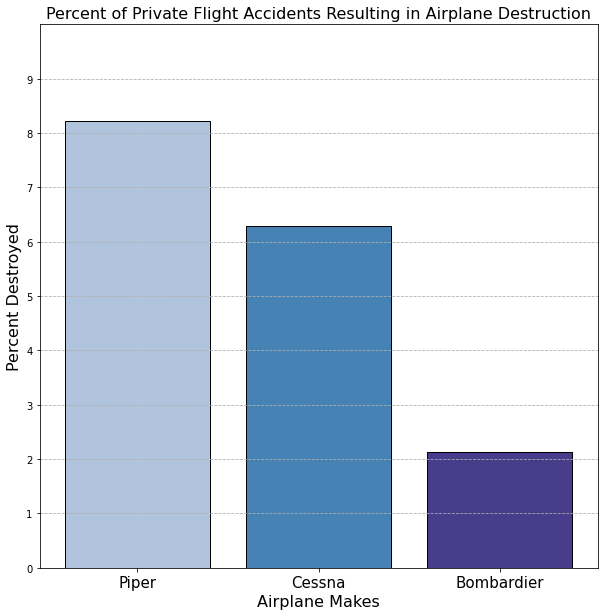

In [45]:
makes = ["Piper", "Cessna", "Bombardier"]
destroyed_dmg_occurence_averages = [Piper_Destroyed, Cessna_Destroyed, Bombardier_Destroyed]

plt.figure(figsize=(10, 10))
plt.bar(makes, destroyed_dmg_occurence_averages, color=["lightsteelblue", "steelblue", "darkslateblue"], edgecolor='black')
plt.xlabel("Airplane Makes", fontsize=16)
plt.ylabel("Percent Destroyed", fontsize=16)
plt.title("Percent of Private Flight Accidents Resulting in Airplane Destruction", fontsize=16)
plt.ylim(0, 10)
plt.yticks(range(0, 10, 1))
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='y', linestyle='--');

In [46]:
#Now we gotta compared the Avearges of Minor Damage and Destroyed for Commercial Flights
Commercial_Flights_Minor_Damage = df[(df['Commercial'] == 'Yes') & (df['Aircraft.damage'] == 'Minor')]
Commercial_Flights_Minor_Damage_Totaled = Commercial_Flights_Minor_Damage['Make'].value_counts().nlargest()
Commercial_Flights_Minor_Damage_Totaled

Boeing    69
Airbus    33
Name: Make, dtype: int64

In [47]:
#Boeing has 1215 occurences in the filtered data set and 39 of those had minor damages
#Airbus has 244 occurences in the filtered data set and 6 of those had minor damages
#Lets find the averages
Boeing_Minor = (69/1215)*100
Airbus_Minor = (33/244)*100

print(Boeing_Minor)
print(Airbus_Minor)

5.679012345679013
13.524590163934427


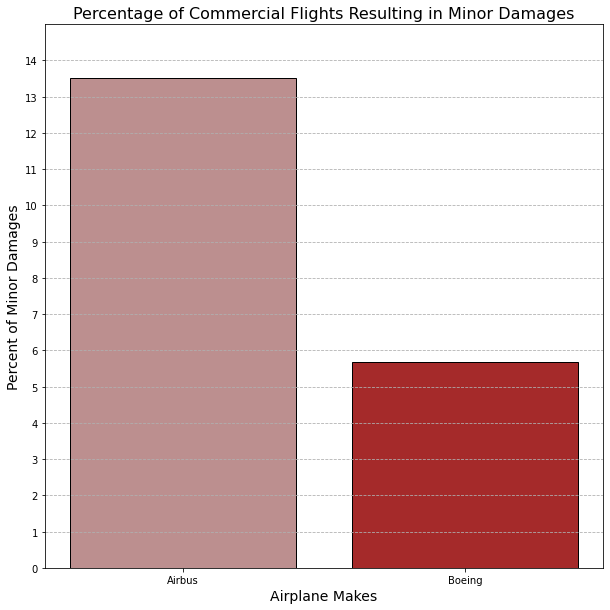

In [48]:
makes = ["Airbus", "Boeing"]
Commercial_MinorDmg_occurance_averages = [Airbus_Minor, Boeing_Minor]
plt.figure(figsize=(10, 10))
plt.bar(makes, Commercial_MinorDmg_occurance_averages, color=["rosybrown", "brown"], edgecolor='black')
plt.xlabel("Airplane Makes", fontsize=14)
plt.ylabel("Percent of Minor Damages", fontsize=14)
plt.title("Percentage of Commercial Flights Resulting in Minor Damages", fontsize=16)
plt.ylim(0, 15)
plt.yticks(range(0, 15, 1))
plt.grid(axis='y', linestyle='--');

In [49]:
Commercial_Flights_Destroyed_Damage = df[(df['Commercial'] == 'Yes') & (df['Aircraft.damage'] == 'Destroyed')]
Commercial_Flights_Destroyed_Damage_Totaled = Commercial_Flights_Destroyed_Damage['Make'].value_counts().nlargest()
Commercial_Flights_Destroyed_Damage_Totaled

Boeing    10
Airbus     1
Name: Make, dtype: int64

In [50]:
#As we can see airbus was only destroyed 1 time out of 244 while Boeing was destroyed 12 times out of 1215
Boeing_Destroyed = (10/1215) *100
Airbus_Destroyed = (1/244) *100

print(Boeing_Destroyed)


0.823045267489712


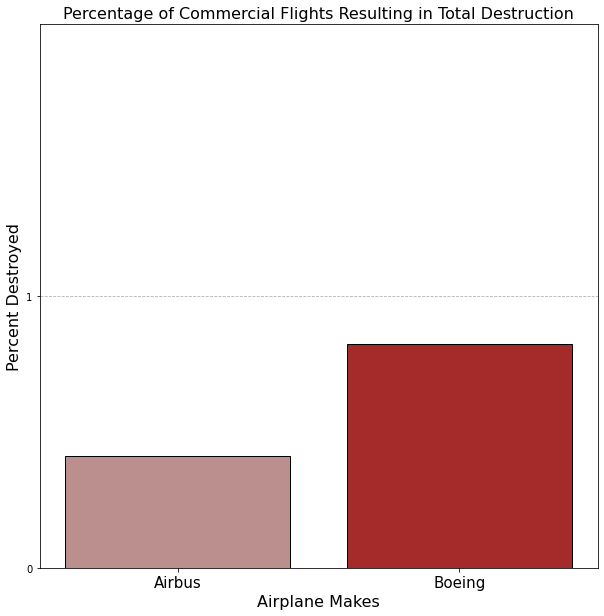

In [51]:

makes = ["Airbus", "Boeing"]
Commercial_DestroyedDmg_occurance_averages = [Airbus_Destroyed, Boeing_Destroyed]
plt.figure(figsize=(10, 10))
plt.bar(makes, Commercial_DestroyedDmg_occurance_averages, color=["rosybrown", "brown"], edgecolor='black')
plt.xlabel("Airplane Makes", fontsize=16)
plt.ylabel("Percent Destroyed", fontsize=16)
plt.title("Percentage of Commercial Flights Resulting in Total Destruction", fontsize=16)
plt.ylim(0, 2)
plt.yticks(range(0, 2, 1))
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='y', linestyle='--');

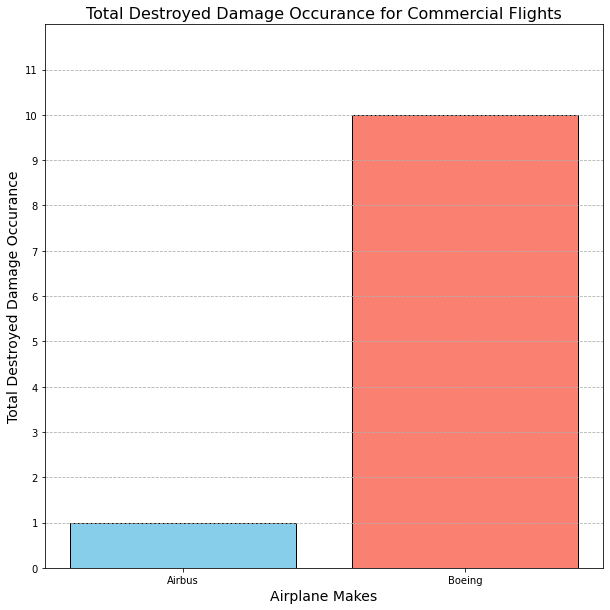

In [52]:
#Since the averages are so small I think our graph should show the number of occurences: Boeing = 12 and Airbus = 1
#The exporatory data can be left here with our description
#In the explanatory presentation we can explain what the 12 and the 1 mean

makes = ["Airbus", "Boeing"]
Commercial_DestroyedDmg_occurance_averages = [1, 10]
plt.figure(figsize=(10, 10))
plt.bar(makes, Commercial_DestroyedDmg_occurance_averages, color=["rosybrown", "brown"], edgecolor='black')
plt.xlabel("Airplane Makes", fontsize=14)
plt.ylabel("Total Destroyed Damage Occurance", fontsize=14)
plt.title("Total Destroyed Damage Occurance for Commercial Flights", fontsize=16)
plt.ylim(0, 12)
plt.yticks(range(0, 12, 1))
plt.grid(axis='y', linestyle='--');

In [53]:
df.to_csv("data/Aviation_FinalData.csv", encoding='ISO-8859-1', index=False)